In [861]:
# Clustring Assignment 

In [862]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [863]:
#Import Libraries
import pandas as pd
import numpy as np

In [864]:
# # For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [865]:
# To Scale our data
from sklearn.preprocessing import scale
# To perform KMeans clustering 
from sklearn.cluster import KMeans
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [866]:
# Import data from dataset 

In [867]:
NGO=pd.read_csv("Country-data.csv")
NGO

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [868]:
# Read and Understand Dataset

In [869]:
NGO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [870]:
NGO.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [871]:
# To check how many rows and columns 
NGO.shape

(167, 10)

In [872]:
# To get breif idea about data set
NGO.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [873]:
# Data cleaning 

In [874]:
# Checking for duplicates in the country column
country = NGO["country"]
NGO[country.isin(country[country.duplicated()])].sort_values("country")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [875]:
# Check the percentage of missing values
round(100*(NGO.isnull().sum()/len(NGO.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [876]:
# There are no null values 

In [877]:
#Visualising the Data

<Figure size 288x288 with 0 Axes>

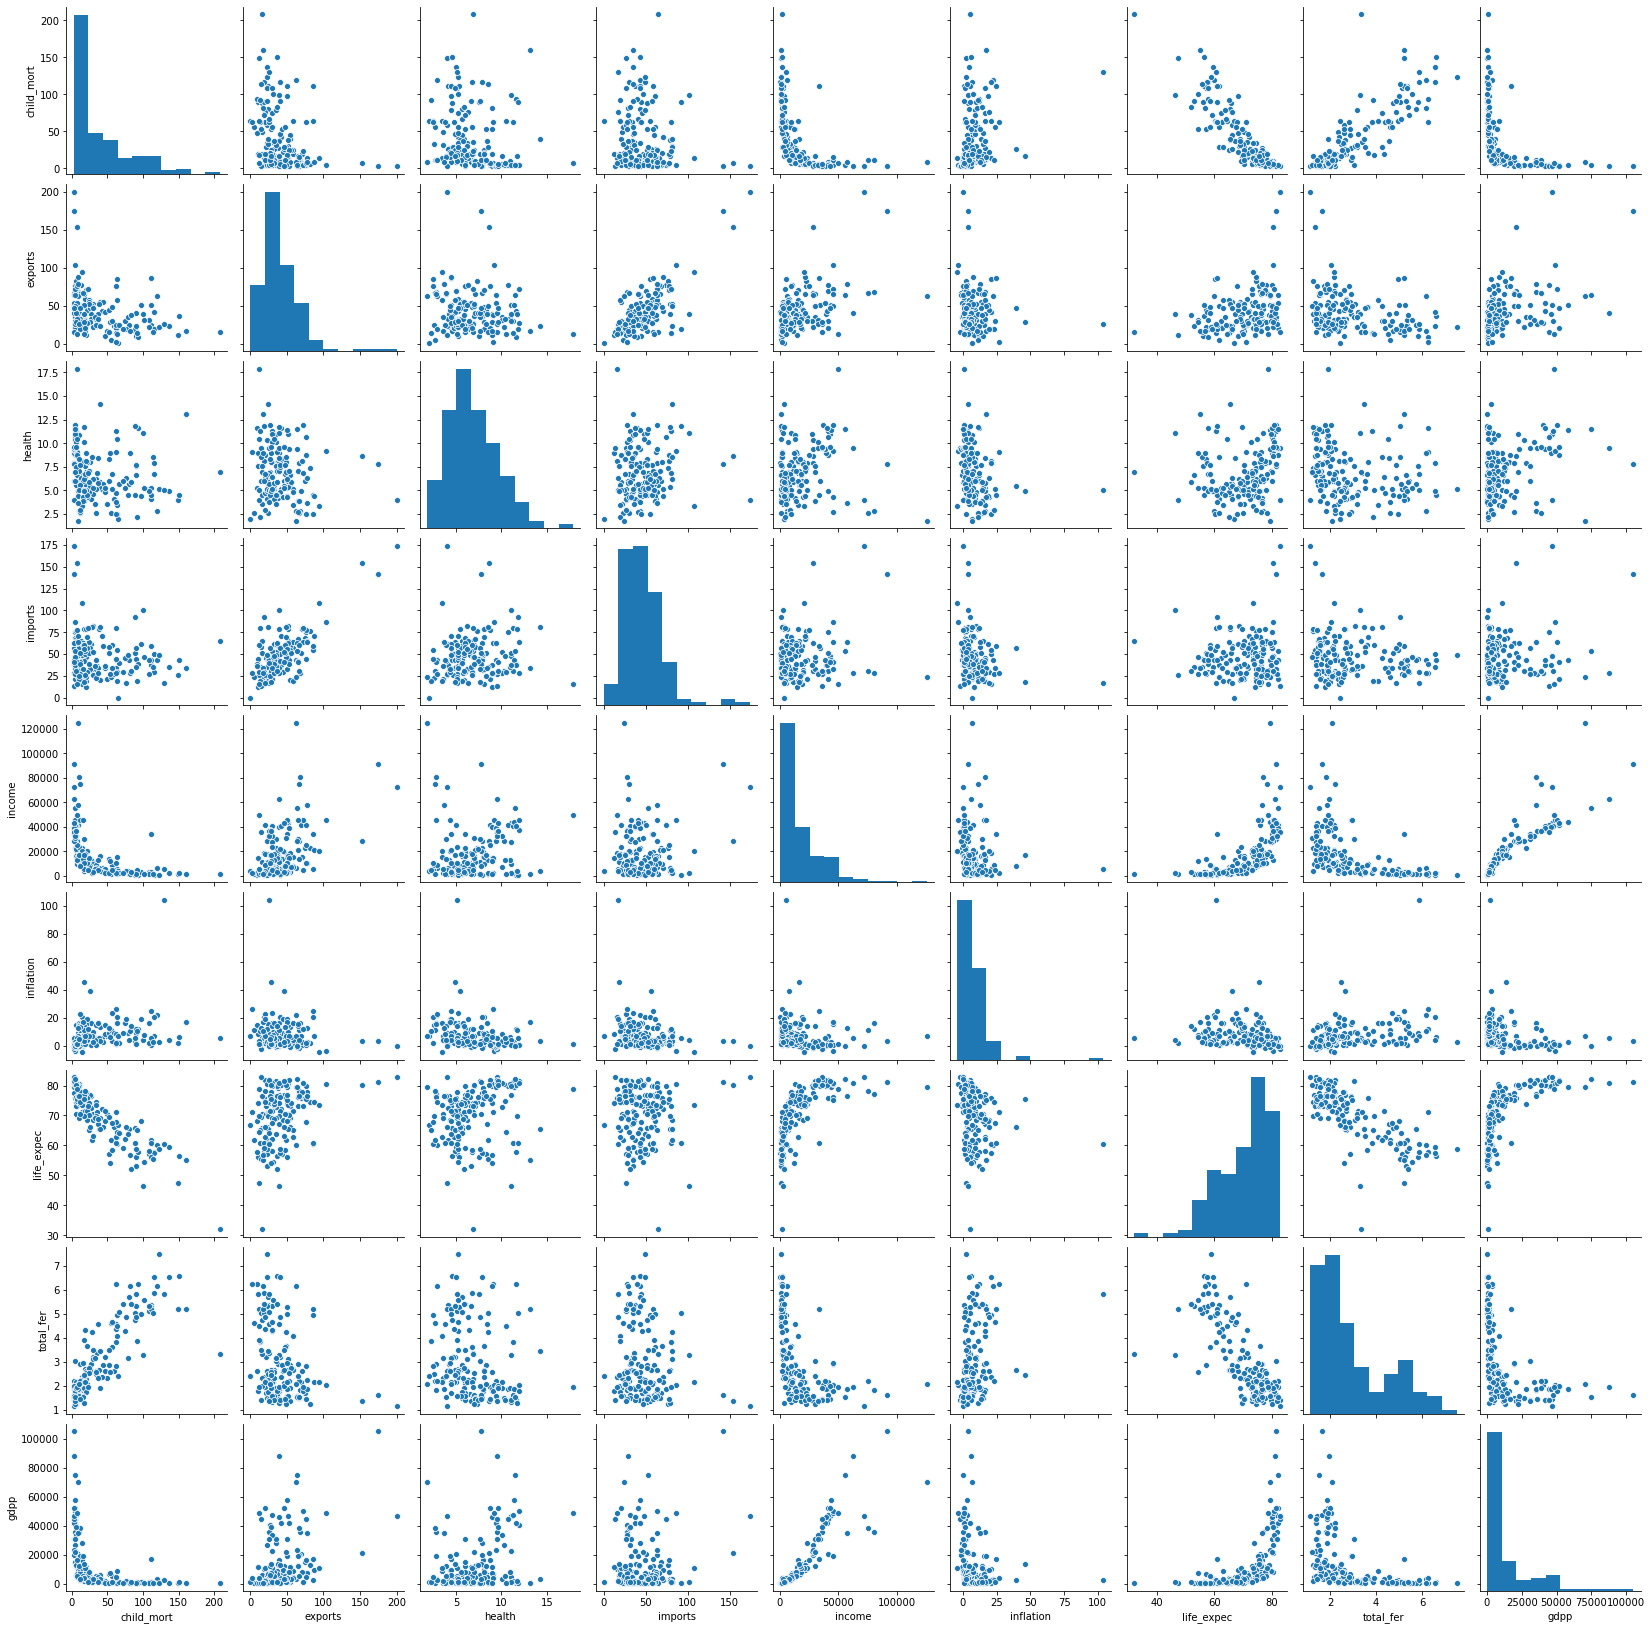

In [878]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(NGO)
plt.show()

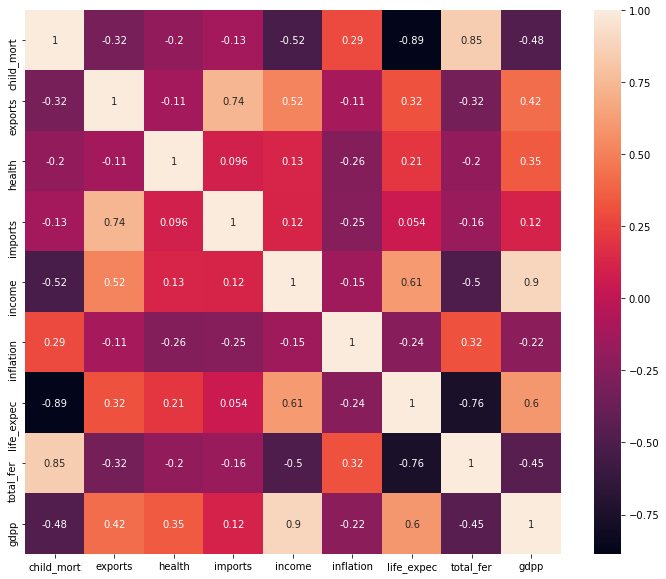

In [879]:
# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (12,10))  
sns.heatmap(NGO.corr(),annot = True)

In [880]:
NGO_final = NGO

In [881]:
# A data frame is made with all the variables except country to find Pc
Data = NGO_final.drop('country', 1)
Data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [882]:
#Standardising Data

In [883]:
# Standardising continuous features
NGO = Data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
stand_NGO=(NGO-NGO.mean())/NGO.std()
Data = Data.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'], 1)
Data = pd.concat([Data,stand_NGO],axis=1)
Data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [884]:
#PCA

In [885]:
# Since there is no need for train test split doing PCA on the original data

In [886]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [887]:
# PCA on the data
pca.fit(Data)

PCA(random_state=42, svd_solver='randomized')

In [888]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [889]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [890]:
#Screeplot

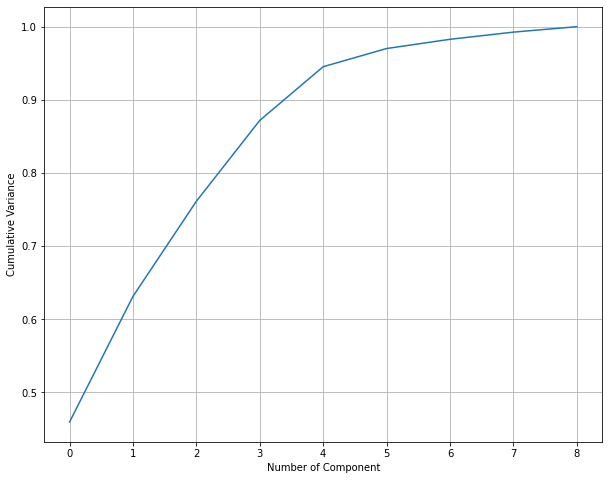

In [891]:
# Plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Component')
plt.ylabel('Cumulative Variance')
plt.grid()
plt.show()

In [892]:
columnsnames = list(Data.columns)
pcs_NGO = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':columnsnames})
pcs_NGO

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


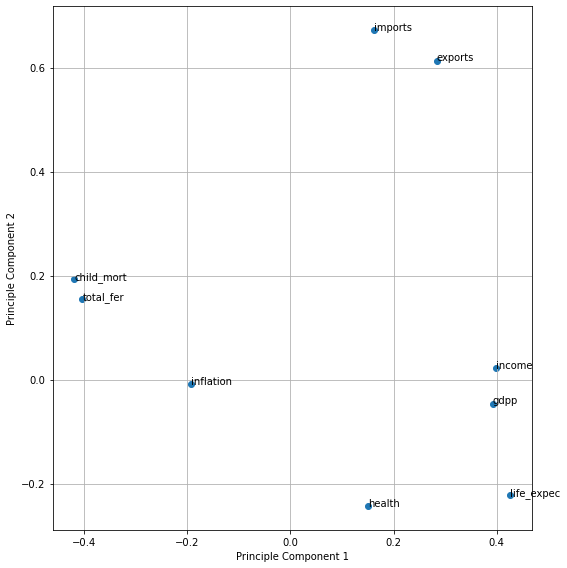

In [893]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_NGO.PC1, pcs_NGO.PC2)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
for i, txt in enumerate(pcs_NGO.Feature):
    plt.annotate(txt, (pcs_NGO.PC1[i],pcs_NGO.PC2[i]))
plt.tight_layout()
plt.grid()
plt.show()

In [894]:
#Using Incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [895]:
NGO_train_pca = pca_final.fit_transform(Data)
NGO_pca = pd.DataFrame(NGO_train_pca)
NGO_pca.columns = ['PC1', 'PC2','PC3','PC4']
NGO_pca

,PC1,PC2,PC3,PC4
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275
...,...,...,...,...
162,-0.820419,0.627187,0.342185,-0.699272
163,-0.535820,-1.173798,-2.913537,-0.125713
164,0.501259,1.403790,0.321252,-1.112667
165,-1.876860,-0.093174,-1.052183,0.056231


In [896]:
#Correlation Matrix

In [897]:
corrmat = np.corrcoef(NGO_train_pca.transpose())

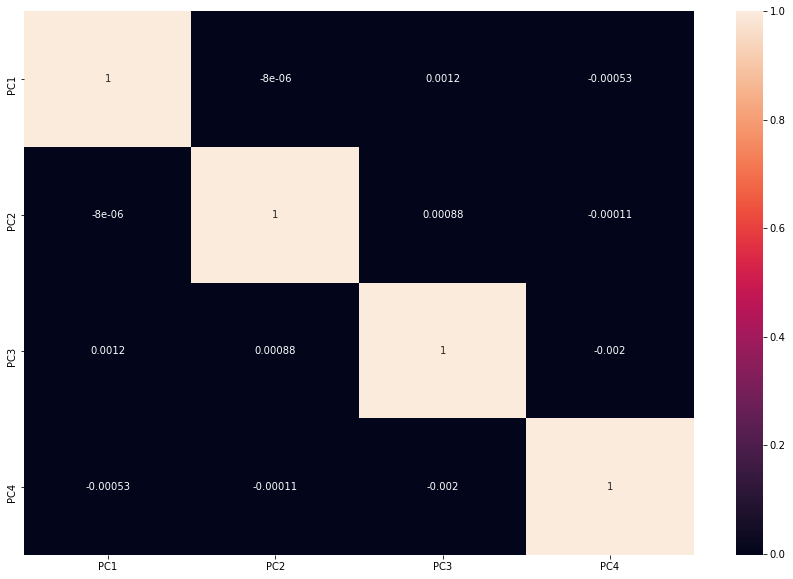

In [898]:
plt.figure(figsize = (15,10))
sns.heatmap(NGO_pca.corr(),annot = True)
plt.show()

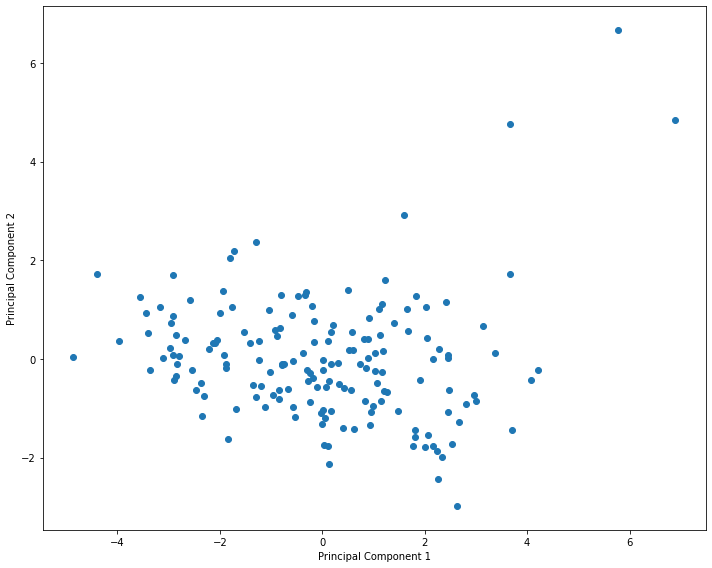

In [899]:
fig = plt.figure(figsize = (10,8))
plt.scatter(NGO_pca.PC1, NGO_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [900]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("maximum correlation:",corrmat_nodiag.max(), ", minimum correlation: ", corrmat_nodiag.min(),)

maximum correlation: 0.0011961925092543056 , minimum correlation:  -0.0020378295355501573


In [901]:
country = pd.DataFrame(country)
country

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
...,...
162,Vanuatu
163,Venezuela
164,Vietnam
165,Yemen


In [902]:
# Correlation are alomst 0 

In [903]:
NGO_pca = pd.concat([country, NGO_pca], axis=1)
NGO_pca

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710
1,Albania,0.428070,-0.586096,0.320090,-1.167681
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578
3,Angola,-2.922180,1.694341,-1.517172,0.873340
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275
...,...,...,...,...,...
162,Vanuatu,-0.820419,0.627187,0.342185,-0.699272
163,Venezuela,-0.535820,-1.173798,-2.913537,-0.125713
164,Vietnam,0.501259,1.403790,0.321252,-1.112667
165,Yemen,-1.876860,-0.093174,-1.052183,0.056231


In [904]:
#Outliers Treatment

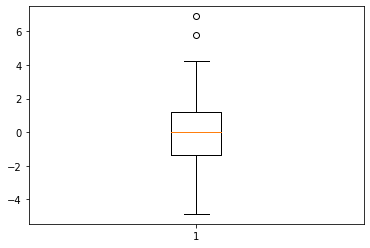

In [905]:
plt.boxplot(NGO_pca.PC1)
Q1 = NGO_pca.PC1.quantile(0.25)
Q3 = NGO_pca.PC1.quantile(0.75)
IQR = Q3 - Q1
NGO_pca = NGO_pca[(NGO_pca.PC1 >= Q1 - 1.5*IQR) & (NGO_pca.PC1 <= Q3 + 1.5*IQR)]
plt.show()

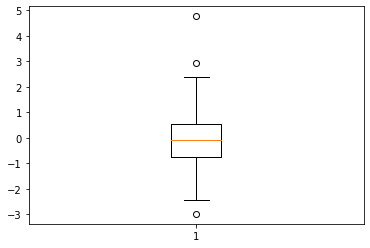

In [906]:
plt.boxplot(NGO_pca.PC2)
Q1 = NGO_pca.PC2.quantile(0.25)
Q3 = NGO_pca.PC2.quantile(0.75)
IQR = Q3 - Q1
NGO_pca = NGO_pca[(NGO_pca.PC2 >= Q1 - 1.5*IQR) & (NGO_pca.PC2 <= Q3 + 1.5*IQR)]
plt.show()

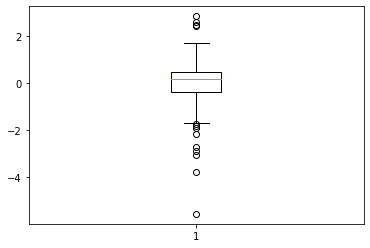

In [907]:
plt.boxplot(NGO_pca.PC3)
Q1 = NGO_pca.PC3.quantile(0.25)
Q3 = NGO_pca.PC3.quantile(0.75)
IQR = Q3 - Q1
NGO_pca = NGO_pca[(NGO_pca.PC3 >= Q1 - 1.5*IQR) & (NGO_pca.PC3 <= Q3 + 1.5*IQR)]
plt.show()

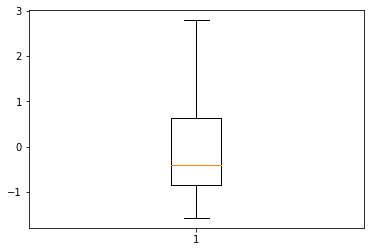

In [908]:
plt.boxplot(NGO_pca.PC4)
Q1 = NGO_pca.PC4.quantile(0.25)
Q3 = NGO_pca.PC4.quantile(0.75)
IQR = Q3 - Q1
NGO_pca = NGO_pca[(NGO_pca.PC4 >= Q1 - 1.5*IQR) & (NGO_pca.PC4 <= Q3 + 1.5*IQR)]
plt.show()

In [909]:
# Check shape of the dataset
NGO_pca.shape

(149, 5)

In [910]:
# Make countrys dataset
country_1 = pd.DataFrame(NGO_pca["country"])

In [911]:
# Drop the country to proceed with clustering
NGO_pca = NGO_pca.drop(['country'],1)
NGO_pca

,PC1,PC2,PC3,PC4
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275
...,...,...,...,...
161,-0.848366,-0.639288,-0.591583,-0.723766
162,-0.820419,0.627187,0.342185,-0.699272
164,0.501259,1.403790,0.321252,-1.112667
165,-1.876860,-0.093174,-1.052183,0.056231


In [912]:
#Hopkins Statistics

In [913]:
#Hopkins Statistics help us to decide whether the cluters can be formed easily or not. If the values are:

#0.01 - 0.3 : Low chase of clustering
#around 0.5 : Random
#0.7 - 0.99 : High chance of clustering 

In [914]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [915]:
hopkins(NGO_pca)

0.7347992500793052

In [916]:
#value is between 0.7 - 0.99, there is a high chance of clustering

In [917]:
#K- Means

In [918]:
# Kmeans with K=3
model_clus4 = KMeans(n_clusters = 3, max_iter=50)
model_clus4.fit(NGO_pca)

KMeans(max_iter=50, n_clusters=3)

In [919]:
# Silhouette Analysis

In [920]:
# Value of the silhouette score range is in between -1 to 1.
# A score closer to 1 : The data point is very similar to other data points in the cluster
# A score closer to -1 : The data point is not similar to the data points in its cluster.

In [921]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(NGO_pca)
    sse_.append([k, silhouette_score(NGO_pca, kmeans.labels_)])

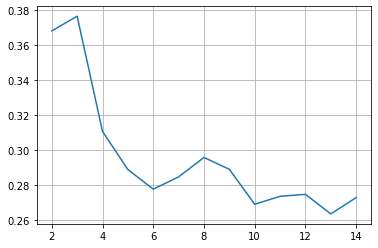

In [922]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.grid()
plt.show()

In [923]:
#Sum of Squared Distances:

In [924]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(NGO_pca)
    ssd.append(model_clus.inertia_)

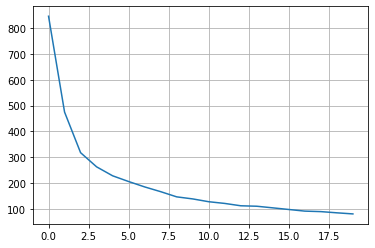

In [925]:
plt.plot(ssd)
plt.grid()
plt.show()

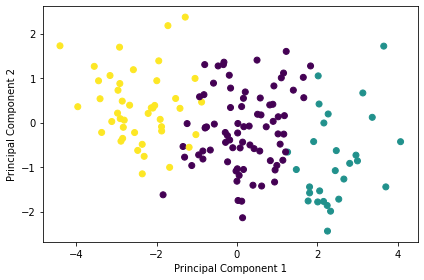

In [926]:
plt.scatter(NGO_pca['PC1'], NGO_pca['PC2'],c=model_clus4.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [927]:
#  as I see the highest peak is at k =4 and in sum of squared distances graph , I see that the elbow is in the range of 3 to 5 , so let us take k as 4.

In [928]:
# Kmeans with K= 4

In [929]:
NGO_pca.index = pd.RangeIndex(len(NGO_pca.index))
NGO_pca_km = pd.concat([NGO_pca, pd.Series(model_clus4.labels_)], axis=1)
NGO_pca_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
NGO_pca_km

,PC1,PC2,PC3,PC4,ClusterID
0,-2.905050,0.088089,0.718841,0.993710,2
1,0.428070,-0.586096,0.320090,-1.167681,0
2,-0.282140,-0.445318,-1.221462,-0.847578,0
3,-2.922180,1.694341,-1.517172,0.873340,2
4,1.028893,0.130097,0.192344,-0.842275,0
...,...,...,...,...,...
144,-0.848366,-0.639288,-0.591583,-0.723766,0
145,-0.820419,0.627187,0.342185,-0.699272,0
146,0.501259,1.403790,0.321252,-1.112667,0
147,-1.876860,-0.093174,-1.052183,0.056231,2


In [930]:
NGO_pca_km.shape

(149, 5)

In [931]:
# Merging country and the above data set
NGO_pca_km = pd.merge(NGO_pca_km,country_1,on=NGO_pca_km['PC1'])
NGO_pca_km = NGO_pca_km.drop('key_0', 1)
NGO_pca_km

,PC1,PC2,PC3,PC4,ClusterID,country
0,-2.905050,0.088089,0.718841,0.993710,2,Afghanistan
1,0.428070,-0.586096,0.320090,-1.167681,0,Albania
2,-0.282140,-0.445318,-1.221462,-0.847578,0,Algeria
3,-2.922180,1.694341,-1.517172,0.873340,2,Angola
4,1.028893,0.130097,0.192344,-0.842275,0,Antigua and Barbuda
...,...,...,...,...,...,...
144,-0.848366,-0.639288,-0.591583,-0.723766,0,Uzbekistan
145,-0.820419,0.627187,0.342185,-0.699272,0,Vanuatu
146,0.501259,1.403790,0.321252,-1.112667,0,Vietnam
147,-1.876860,-0.093174,-1.052183,0.056231,2,Yemen


In [933]:
NGO_country_clusterid1 = pd.merge(NGO_pca_km,NGO_final,on='country',how='inner')
NGO_country_clusterid1

,PC1,PC2,PC3,PC4,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.905050,0.088089,0.718841,0.993710,2,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.428070,-0.586096,0.320090,-1.167681,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282140,-0.445318,-1.221462,-0.847578,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.922180,1.694341,-1.517172,0.873340,2,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.028893,0.130097,0.192344,-0.842275,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,-0.848366,-0.639288,-0.591583,-0.723766,0,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
145,-0.820419,0.627187,0.342185,-0.699272,0,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
146,0.501259,1.403790,0.321252,-1.112667,0,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
147,-1.876860,-0.093174,-1.052183,0.056231,2,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [934]:
km_clusters_child_mort = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).gdpp.mean())
km_clusters_PC1 = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = pd.DataFrame(NGO_country_clusterid1.groupby(["ClusterID"]).PC4.mean())

In [936]:
NGO = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp,km_clusters_PC1,km_clusters_PC2,km_clusters_PC3,km_clusters_PC4], axis=1)
NGO.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean","PC1_mean","PC2_mean","PC3_mean","PC4_mean"]
NGO.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,22.135897,40.183192,6.223718,47.273922,11697.051282,6.989987,72.805128,2.281667,6012.717949,0.166819,-0.146430,0.023138,-0.795092
1,1,4.521429,45.200000,9.670714,43.389286,37360.714286,1.154571,80.289286,1.740714,40603.571429,2.445401,-0.830759,0.326261,0.772250
2,2,92.732558,29.604884,6.069535,39.495349,4077.511628,10.460116,59.379070,5.055349,1977.558140,-2.428783,0.364019,0.061477,0.641638
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


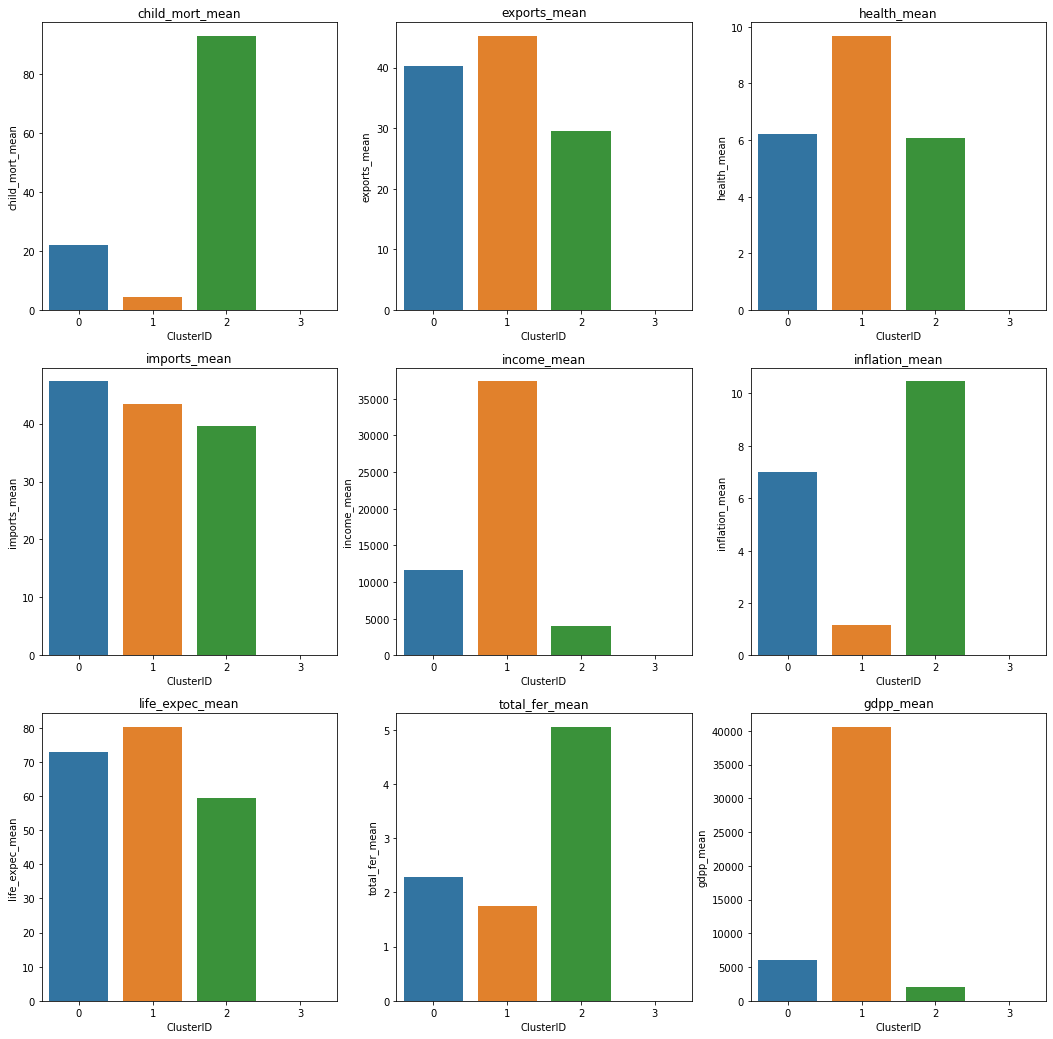

In [939]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(NGO.ClusterID,NGO.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(NGO.ClusterID, NGO.exports_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(NGO.ClusterID, NGO.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(NGO.ClusterID, NGO.imports_mean)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(NGO.ClusterID, NGO.income_mean)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(NGO.ClusterID, NGO.inflation_mean)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(NGO.ClusterID, NGO.life_expec_mean)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(NGO.ClusterID, NGO.total_fer_mean)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(NGO.ClusterID, NGO.gdpp_mean)

plt.show()

In [ ]:
#Net income per person is the lowest in ClusterID = 0
#The GDP per capita is the lowest in ClusterID = 0
#The average number of years a new born child would live is the lowest in ClusterID = 0
#Total health spending is the lowest in ClusterID = 0
#Imports of goods and services is the lowest in ClusterID = 0
#The measurement of the annual growth rate is the highest in ClusterID = 0
#The number of children that would be born is the highest in ClusterID = 0
#Child Mortality rate is the highest in ClusterID = 0

In [941]:
# Hierarchical Clustering

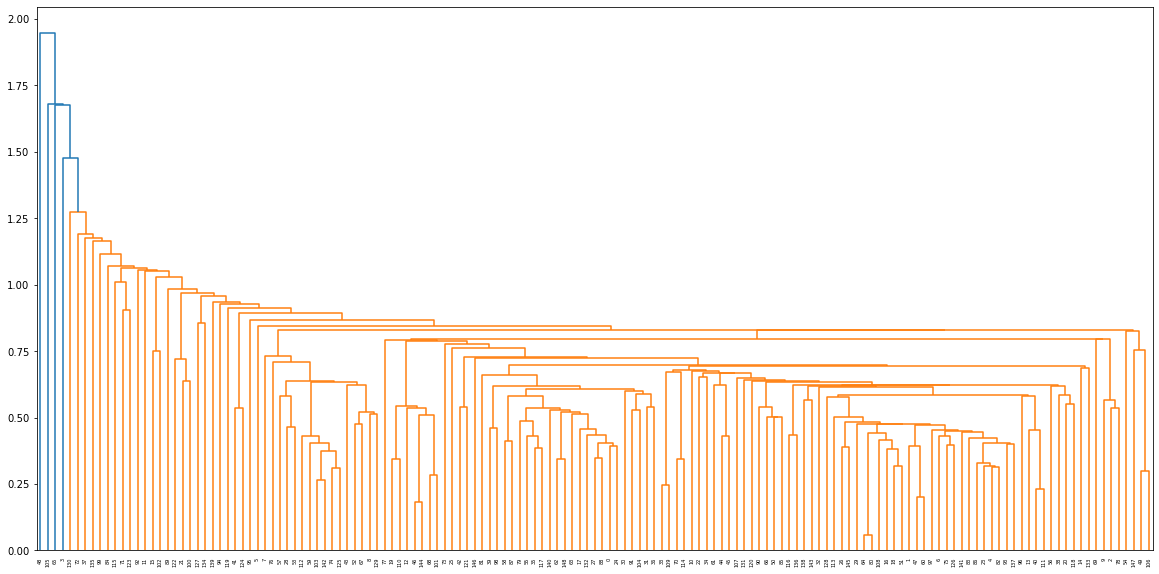

In [942]:
plt.figure(figsize = (20,10))
mergings = linkage(NGO_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

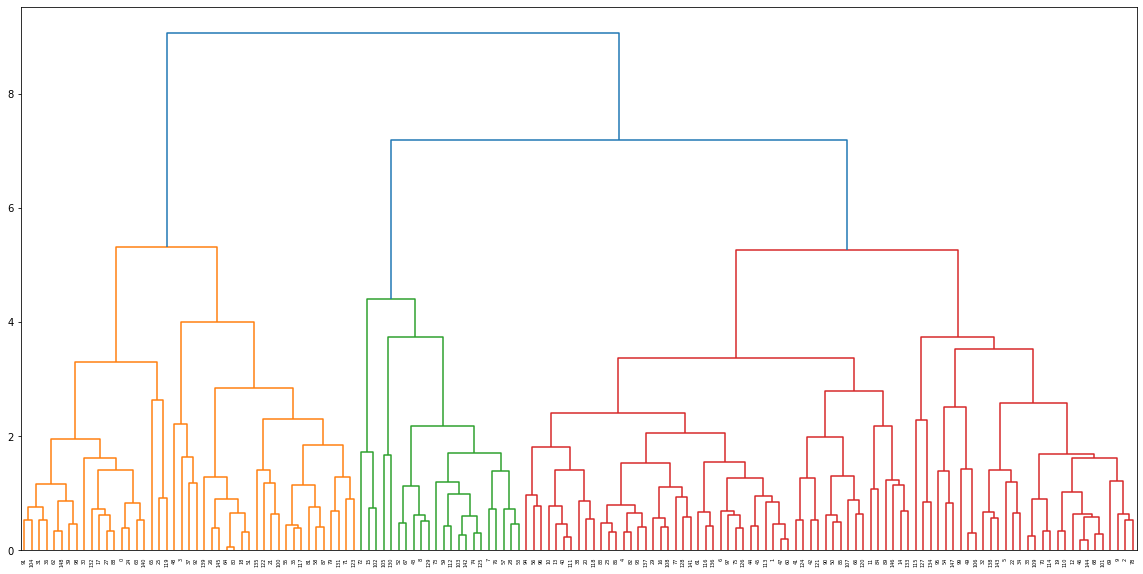

In [944]:
plt.figure(figsize = (20,10))
mergings = linkage(NGO_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [945]:
NGO_country_clusterid1

,PC1,PC2,PC3,PC4,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.905050,0.088089,0.718841,0.993710,2,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.428070,-0.586096,0.320090,-1.167681,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282140,-0.445318,-1.221462,-0.847578,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.922180,1.694341,-1.517172,0.873340,2,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.028893,0.130097,0.192344,-0.842275,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,-0.848366,-0.639288,-0.591583,-0.723766,0,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
145,-0.820419,0.627187,0.342185,-0.699272,0,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
146,0.501259,1.403790,0.321252,-1.112667,0,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
147,-1.876860,-0.093174,-1.052183,0.056231,2,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [947]:
NGO1 = NGO_country_clusterid1.loc[NGO_country_clusterid1['ClusterID'] == 0]
result = pd.DataFrame(NGO1.country)
result

,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia
...,...
141,Ukraine
143,Uruguay
144,Uzbekistan
145,Vanuatu


In [ ]:
# Scatterplots between original variables and cluster id:

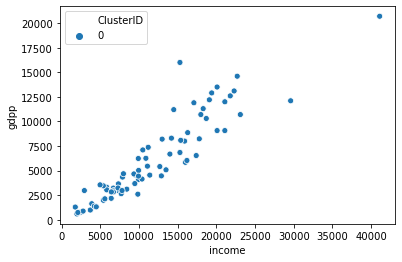

In [956]:
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',legend='full',data=NGO1)

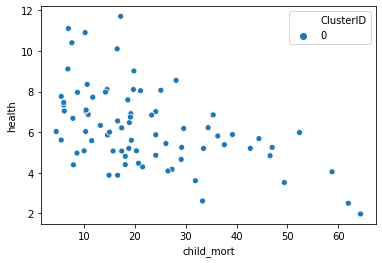

In [957]:
# scatterplot for child mort ,inflation for different cluster ids
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',legend='full',data=NGO1)

In [958]:
#Conclusion
#The countries that require help the most are listed below:
#1 Albania
#2 Algeria
#4 Antigua and Barbuda
#5 Argentina
#6 Armenia

In [959]:
#very low rate of net income per person, GDP per capita, average number of years a new born child would live, total health spending and imports of goods and services.
#very high rate of measurement of the annual growth rate, number of children that would be born and child mortality rate.
#It is clear that these countries require very quick aid in terms of money, education and services.